A variety of programming languages have sprung up in the world of quantum computing in recent years, and many of these are developed and backed by some of the world's biggest companies. Q# was created at Microsoft, so we expect to be able to use it with Azure Quantum - and we can! However, Azure Quantum also offers support for languages that weren't homegrown internally. These languages are Qiskit (from IBM) and Cirq (from Google).

Today, we'll take a look at how to use Qiskit, which is based on the Python programming language, to create our first circuit in Azure Quantum! We'll get familiar with some single-qubit gates, how qubits behave when multiple gates are applied to them, and how to use the Bloch sphere to visualize qubit transformations. Spoiler alert: we'll need more than one circuit to address all these topics, but that just means you'll get comfotable with building and running them!

This blog post assumes that you've already set up an Azure account, created a subscription, navigated to the Azure Quantum service and created a Quantum Workspace.

**Getting Started**

The first step is to create a new Jupyter notebook in your Quantum Workspace. You can do this by clicking the three dots next to "My notebooks" in the Workspace's file explorer, then clicking "New Notebook".

ADD IMAGE HERE

You'll be given the opportunity to choose the kernel type you want to use, and to give your notebook a name. Choose IPython as the kernel, and give the notebook a descriptive name, like `my-first-azure-quantum-circuit.ipynb`.

Once your notebook is created, you'll see that it comes preloaded with some lines of code.

ADD IMAGE HERE

The purpose of this code is to create a Workspace object which has many useful methods associated with it, but you don't actually need that today, so you can clean up your notebook but deleting that chunk and starting with a blank notebook.

**Code Setup**

In your `.ipynb` file, add the following lines of code:


In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

The `import` statements above include the Qiskit features we'll use in this tutorial. We'll talk about each as it gets used in the code.

One thing to note is that there is no `import qiskit` line at the beginning of the file. We don't need this because Qiskit comes preloaded with your Workspace as part of the `azure-quantum` Python package, so you can just start using it right away. This is extra convenient if you decide to start working locally on your machine.

The last line we need for our setup is:



In [2]:
aer_simulator = Aer.get_backend('aer_simulator')

This line might lead to the following questions for you:
1. What is Aer?
2. What is a simulator?
3. What is a backend?

Let's consider them one by one.

1. Aer is a framework that comes included with Qiskit that offers a particular kind of simulator.
2. A quantum simulator uses classical computing to run quantum circuits in a way that attempts to mimic qubits. Azure Quantum allows you to work with a number of different simulators at no cost.
3. A backend, also referred to as a target, is the specific simulator you are using. Right now ours is `aer_simulator`. Some other examples offered by Azure Quantum: `rigetti.sim.qvm`, `ionq.simulator`, and `quantinuum.sim.h1-1sc`. Rigetti, IonQ, and Quantinuum are called providers - they build these simulators for us to use.

If you want to see a list of the providers available in your Workspace, see this [post](https://learn.microsoft.com/en-us/azure/quantum/quickstart-microsoft-qiskit?pivots=platform-ionq#list-all-backends).

**Your Circuit Template**

We'll build several circuits with gates soon, but for now let's look at the most basic skeleton version of the code blocks we'll be using.



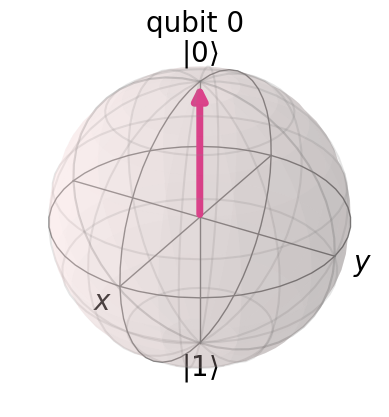

In [3]:
# 1. Initial circuit steps
basic_circuit = QuantumCircuit(1)
basic_circuit.save_statevector()

# 2. Running the circuit
qobj = assemble(basic_circuit)
statevector = aer_simulator.run(qobj).result().get_statevector()

# 3. Plot the resulting state vector on a Bloch sphere
plot_bloch_multivector(statevector)

Here, you just created a QuantumCircuit object with one qubit, and represented it on a Bloch sphere.

A Bloch sphere is how we map the qubit's wave function onto a 3D space that is easier to visualize. This is the function that gives us information about the probability of a qubit being measured in a given state. On every Bloch sphere you'll see an arrow, which represents the state vector of that qubit.

The above is what the Bloch sphere looks like by default.

The top of the Bloch sphere represents the state |0>, which in this example is also the current state of the qubit (the pink line is the state vector). That's because this is the state Qiskit always initalizes the qubit in, which correlates to the vector (1, 0) and points lives along the positive z-axis.

If you need more information on using vectors to represent quantum states, check out my post [here](https://definitelynotavampire.com/blog/2020/8/7/using-unit-vectors-to-describe-quantum-states).

In the preceeding code block, you are saving the `statevector` state that the qubit is currently in as the final step of your circuit. Now you're ready to run the circuit, which you do by creating an object based on the circuit itself to run on the simulator, then doing so and getting the saved state returned. Finally, this gets plotted on the Bloch sphere with the `plot_bloch_multivector()` function.

We can also use the simulator to run our circuit many times to see how the qubits behave stastically. Here is the block for that:


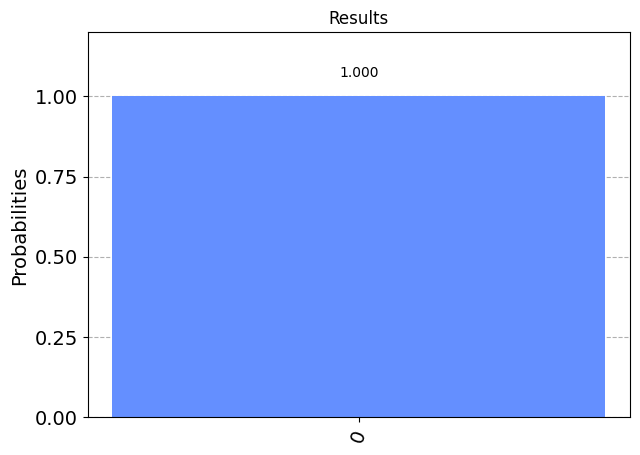

In [4]:
# 4. Run the job 100 times
job = aer_simulator.run(basic_circuit, count=100)
result = job.result()

# 5. Plot the results of the jobs
plot_histogram(result.get_counts(basic_circuit), title="Results")

As expected, we see the qubit returned in the state `0` or |0> every time, which makes sense because we didn't do anything to it after it was initliazed.

The five code pieces used in this section create our "circuit template" when put together. Now we can start adding gates to see how that changes our circuit diagrams, the states represented on the Bloch sphere, and the resulting output.

**Adding Your First Gate: The Hadamard Gate**

When you're getting started, it'll be most straightforward to look at single-qubit gates first - these are called unary gates.

The Hadamard gate, also called the H gate or operator, puts a qubit into a state that tells you a lot about quantum mechanics and quantum computing.

When the H gate is applied to a qubit in the |0> state, the qubit undergoes a transformation that puts it into a state of superposition. This means the qubit's state is indeterminate until we measure it. However, before we do that, we can map the probability of measuring either a |0> or a |1> on the Bloch sphere.



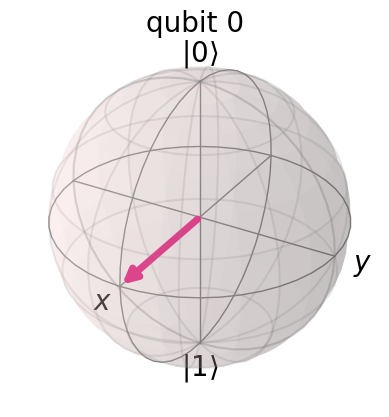

In [5]:
# A circuit demonstrating what happens when the H gate is applied
h_circuit = QuantumCircuit(1)
h_circuit.h(0)

h_circuit.save_statevector()

qobj = assemble(h_circuit)
statevector = aer_simulator.run(qobj).result().get_statevector()

plot_bloch_multivector(statevector)

You can see that the arrow has moved from the z-axis to the x-axis, specifically the positive side. The arrow is between |0> and |1> visually, and in actuality it is also "in between" the two in the sense that the state has a 50% chance of collapsing into either |0> or |1> when measured. You can see this when you run the job and plot the results.

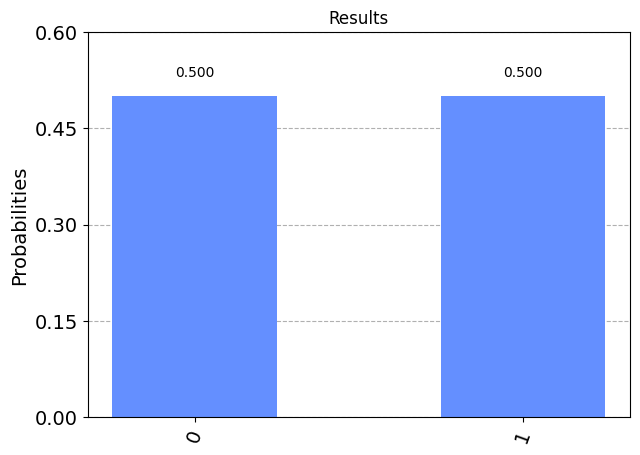

In [6]:
job = aer_simulator.run(h_circuit, count=100)
result = job.result()
plot_histogram(result.get_counts(h_circuit), title="Results")

**One More Gate: The NOT Gate**

The NOT gate is also called the X operator and the bit flip operator because it transforms |0> to |1> and vice versa, which we can see clearly on the Bloch sphere:

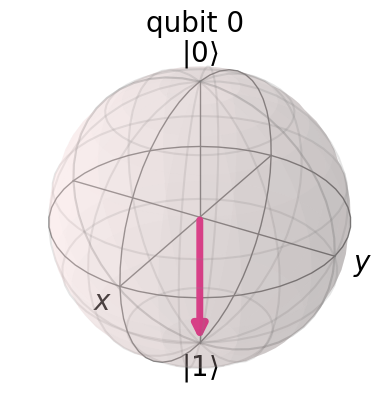

In [7]:
# A circuit demonstrating what happens when the X gate is applied
x_circuit = QuantumCircuit(1)
x_circuit.x(0)

x_circuit.save_statevector()

qobj = assemble(x_circuit)
statevector = aer_simulator.run(qobj).result().get_statevector()

plot_bloch_multivector(statevector)

Try running this experiment on the simulator to see the results. You should end up with 100% probability of measuring the qubit in the |1> state.

**Combining Two Gates**

Now you can try combining gates to see how applying them back to back impacts the wave function of the qubit.

Start by applying the X gate first, then H:

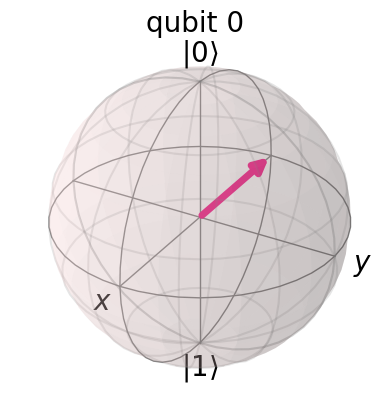

In [8]:
# A circuit demonstrating what happens when the X, then H, gate is applied
x_h_circuit = QuantumCircuit(1)
x_h_circuit.x(0)
x_h_circuit.h(0)

x_h_circuit.save_statevector()

qobj = assemble(x_h_circuit)
statevector = aer_simulator.run(qobj).result().get_statevector()

plot_bloch_multivector(statevector)

You can see now that the arrow is again between |0> and |1> but now it's on the negative side of the x-axis.

Let's see how this impacts the final results of running the job.

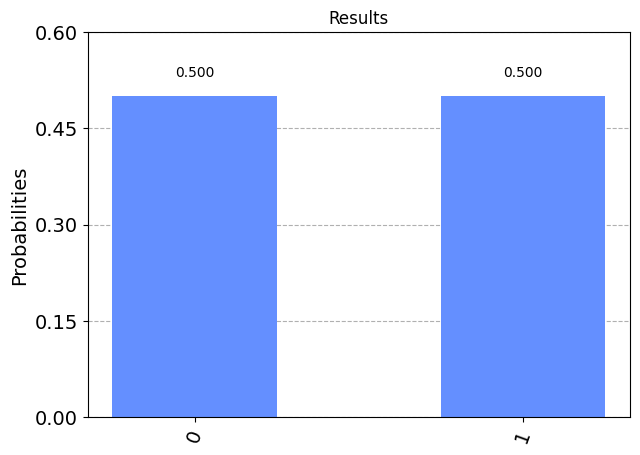

In [9]:
job = aer_simulator.run(x_h_circuit, count=100)
result = job.result()
plot_histogram(result.get_counts(x_h_circuit), title="Results")

The result is still a 50/50 split, meaning the qubit was once again put into a state of *uniform* superposition, where there is an equal chance of it being measured in a |0> or |1> state, even though the state vector lands on a different spot on the Bloch sphere.

Another interesting series of gates to be familiar with is two H gates applied back to back.

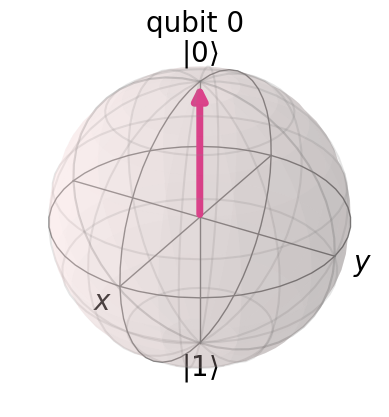

In [10]:
# A circuit demonstrating what happens when the H gate is applied twice
h_h_circuit = QuantumCircuit(1)
h_h_circuit.h(0)
h_h_circuit.h(0)

h_h_circuit.save_statevector()

qobj = assemble(h_h_circuit)
statevector = aer_simulator.run(qobj).result().get_statevector()

plot_bloch_multivector(statevector)

This lands us back where we started, at the top of the Bloch sphere.

The reason for this is that the H gate applied twice is equivalent to the identity operator, which keep the qubit in the state it's in. Applying the X gate twice in a row will do the same. 

The statistical likelihood of measuring a |0> in this case is 100%.

**Combining Three Gates**

Let's look at a final combination of gates that will help deepend our understanding of the H and X gates.

Consider the following circuit:

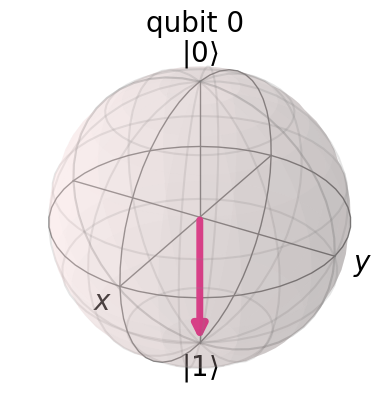

In [11]:
# A circuit demonstrating what happens when gates X, H, H are applied in succession
x_h_h_circuit = QuantumCircuit(1)
x_h_h_circuit.x(0)
x_h_h_circuit.h(0)
x_h_h_circuit.h(0)

x_h_h_circuit.save_statevector()

qobj = assemble(x_h_h_circuit)
statevector = aer_simulator.run(qobj).result().get_statevector()

plot_bloch_multivector(statevector)

When know that if the X gate and then the H gate is applied, the arrow will land on the negative side of the x-axis.

Now, this new Bloch sphere shows us that when the qubit is in that version of uniform superposition, and the H gate is applied once more, the state vector moves reliably to |1>. This is the same as having a circuit made of the X operator, follow by the identity operator.

To prove the "reliably" part, we can confirm the results:

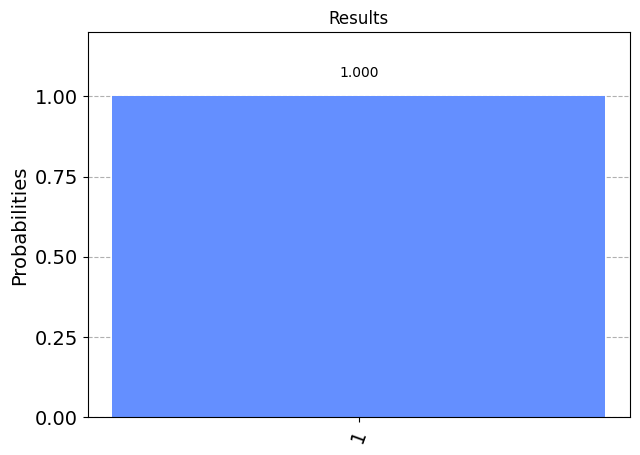

In [12]:
job = aer_simulator.run(x_h_h_circuit, count=100)
result = job.result()
plot_histogram(result.get_counts(x_h_h_circuit), title="Results")

**Conclusion**

The combination of using Azure Quantum together with Qiskit makes getting started with your first circuits feel straightforward and rewarding. The Azure Quantum portal experience means you don't need to download or run anything locally, and you can get started using simulators right away at no cost.

Once you've gotten a sense for Qiskit, check out the other languages that are supported by Azure Quantum as well, namely [Q#](https://learn.microsoft.com/en-us/azure/quantum/user-guide/) and [Cirq](https://learn.microsoft.com/en-us/azure/quantum/quickstart-microsoft-cirq-portal?pivots=platform-ionq)! And also try to play around with other simulators to see the variety of their advantages and disadvantages. When you're ready, you can start running your circuit on [actual qubits](https://learn.microsoft.com/en-us/azure/quantum/qc-target-list).